# MSIS 579 HW3 RNN to Classify Reuters Topics

In this homework, we will train a recurrent neural network to Classify Reuters newswires into 46 Topics.

Dataset of 11,228 newswires from Reuters, labeled over 46 topics. As with the IMDB dataset, each wire is encoded as a sequence of word indexes (same conventions).

In [13]:
%tensorflow_version 1.14
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

from __future__ import print_function

import numpy as np
import keras
keras.__version__

!pip install numpy==1.16.1

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


## Load Reuters Dataset

First let's load the Reuters dataset. Please refer to [this API page](https://keras.io/datasets/#reuters-newswire-topics-classification) for details on how to load the data.

In [14]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

max_words = 10000

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words) #test_split=0.2)
word_index = reuters.get_word_index(path="reuters_word_index.json")

Loading data...


In [15]:
print("x_train ", x_train.shape)
print("y_train ", y_train.shape)
print("x_test ", x_test.shape)
print("y_test ", y_test.shape)

x_train  (8982,)
y_train  (8982,)
x_test  (2246,)
y_test  (2246,)


## Task 1: Fully Connected Neural Networks

In this task, we will learn a word embedding layer as well as fully connected layers to classify Reuters newwires. Please refer to the lab code from lesson 4. Watch out the overfitting. 

In [0]:
# TODO
from keras.layers import Embedding
embedding_layer = Embedding(10000, 64) 

In [17]:
from keras import preprocessing
from tensorflow.keras import utils as np_utils

maxlen = 200
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print("Train_Labels ", y_train.shape)
print("Test_labels ", y_test.shape)
print("x_train ", x_train.shape)
print("y_train ", y_train.shape)
print("x_test ", x_test.shape)

Train_Labels  (8982, 46)
Test_labels  (2246, 46)
x_train  (8982, 200)
y_train  (8982, 46)
x_test  (2246, 200)


In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras import optimizers

model = Sequential()

model.add(Embedding(10000,8,input_length=200))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss ='categorical_crossentropy',
    metrics =['acc']
)

In [19]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 8)            80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               819712    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 46)                23598     
Total params: 923,310
Trainable params: 923,310
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(
    x_train, 
    y_train,
    epochs = 10,
    batch_size = 128, validation_split = 0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 2s 235us/step - loss: 2.2142 - acc: 0.4274 - val_loss: 1.8669 - val_acc: 0.4958
Epoch 2/10
7185/7185 [==============================] - 2s 213us/step - loss: 1.6930 - acc: 0.5570 - val_loss: 1.5972 - val_acc: 0.5748
Epoch 3/10
7185/7185 [==============================] - 2s 216us/step - loss: 1.4272 - acc: 0.6404 - val_loss: 1.4946 - val_acc: 0.6132
Epoch 4/10
7185/7185 [==============================] - 2s 213us/step - loss: 1.2154 - acc: 0.6960 - val_loss: 1.3755 - val_acc: 0.6617
Epoch 5/10
7185/7185 [==============================] - 2s 211us/step - loss: 0.9981 - acc: 0.7541 - val_loss: 1.3296 - val_acc: 0.6706
Epoch 6/10
7185/7185 [==============================] - 2s 212us/step - loss: 0.8137 - acc: 0.8053 - val_loss: 1.3040 - val_acc: 0.6906
Epoch 7/10
7185/7185 [==============================] - 1s 208us/step - loss: 0.6549 - acc: 0.8430 - val_loss: 1.2970 - val_acc: 0.6967


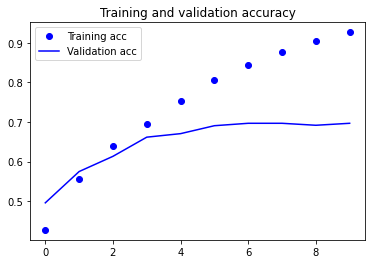

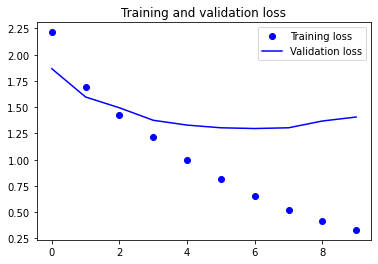

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
results = model.evaluate(x_test, y_test)

print("Test Loss and Accuracy:",results)

2246/2246 [==============================] - 0s 93us/step
Test Loss and Accuracy: [1.4455743980322793, 0.6789848804473877]


## Task 2: RNN/LSTM
Now, we have a fully connected neural networks trained for prediction topics in Reuters data. In this task, we will swap out the fully connect layers and replace with a more powerful RNN layers (LSTM, GRU). Try experiment with different RNN layers and see if they can help improve the model performance.

In [23]:
# TODO
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN

model2 = Sequential()
model2.add(Embedding(10000, 200))
model2.add(SimpleRNN(32))
model2.add(Dropout(0.5))
model2.add(Dense(46, activation='softmax'))


model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
history = model2.fit(
    x_train, 
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 8s 1ms/step - loss: 2.8637 - acc: 0.3364 - val_loss: 2.3399 - val_acc: 0.3645
Epoch 2/10
7185/7185 [==============================] - 8s 1ms/step - loss: 2.2223 - acc: 0.4370 - val_loss: 2.0490 - val_acc: 0.4385
Epoch 3/10
7185/7185 [==============================] - 8s 1ms/step - loss: 1.9366 - acc: 0.4942 - val_loss: 2.0168 - val_acc: 0.3962
Epoch 4/10
7185/7185 [==============================] - 8s 1ms/step - loss: 1.7293 - acc: 0.5566 - val_loss: 1.9304 - val_acc: 0.4407
Epoch 5/10
7185/7185 [==============================] - 8s 1ms/step - loss: 1.5418 - acc: 0.6161 - val_loss: 1.9634 - val_acc: 0.4775
Epoch 6/10
7185/7185 [==============================] - 8s 1ms/step - loss: 1.3986 - acc: 0.6647 - val_loss: 1.8829 - val_acc: 0.4697
Epoch 7/10
7185/7185 [==============================] - 8s 1ms/step - loss: 1.2681 - acc: 0.6967 - val_loss: 1.9287 - val_acc: 0.4758
Epoch 8/10
718

In [25]:
results = model2.evaluate(x_test, y_test)

print("Test Loss and Accuracy:",results)

2246/2246 [==============================] - 1s 455us/step
Test Loss and Accuracy: [2.089393904669839, 0.4661620557308197]


In [26]:
from keras.layers import LSTM

model3 = Sequential()
model3.add(Embedding(10000, 200))
model3.add(LSTM(32))
model3.add(Dropout(0.5))
model3.add(Dense(46, activation='softmax'))


model3.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
history = model3.fit(
    x_train, 
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 20s 3ms/step - loss: 2.7404 - acc: 0.3926 - val_loss: 2.0936 - val_acc: 0.4780
Epoch 2/10
7185/7185 [==============================] - 20s 3ms/step - loss: 1.9963 - acc: 0.5157 - val_loss: 1.7665 - val_acc: 0.5520
Epoch 3/10
7185/7185 [==============================] - 19s 3ms/step - loss: 1.8013 - acc: 0.5605 - val_loss: 1.7098 - val_acc: 0.5626
Epoch 4/10
7185/7185 [==============================] - 19s 3ms/step - loss: 1.7136 - acc: 0.5747 - val_loss: 1.6802 - val_acc: 0.5721
Epoch 5/10
7185/7185 [==============================] - 19s 3ms/step - loss: 1.6408 - acc: 0.5911 - val_loss: 1.6756 - val_acc: 0.5726
Epoch 6/10
7185/7185 [==============================] - 19s 3ms/step - loss: 1.5593 - acc: 0.6125 - val_loss: 1.6298 - val_acc: 0.5854
Epoch 7/10
7185/7185 [==============================] - 19s 3ms/step - loss: 1.4586 - acc: 0.6406 - val_loss: 1.5905 - val_acc: 0.6183
Epoch 8

In [27]:
 results = model3.evaluate(x_test, y_test)

print("Test Loss and Accuracy:",results)

2246/2246 [==============================] - 2s 837us/step
Test Loss and Accuracy: [1.566176163014406, 0.6375778913497925]


## Task 3: Use a Pre-trained Word Embedding

In this task, instead of learning the word embedding layer from scratch, we apply a pre-trained word embedding layer and only use the classification base for reuters data. Please refer to the [API](https://keras.io/examples/pretrained_word_embeddings/) for different pre-trained word embedding.

Does the pre-trained word embedding help improve the model prediction?


In [0]:
# TODO
from __future__ import print_function

import os
import sys
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.initializers import Constant

In [29]:
#download glove 
!wget --no-check-certificate \
    http://nlp.stanford.edu/data/glove.6B.zip \
    -O /tmp/glove.6B.zip

--2020-05-10 01:16:32--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-05-10 01:16:32--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-05-10 01:16:32--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/tmp/glove.6B.zip’

/t

In [30]:
#unzip and use 100d
import os
import zipfile

local_zip = '/tmp/glove.6B.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/')
zip_ref.close()
BASE_DIR = ''
GLOVE_DIR = os.path.join('/tmp/')
zip_ref.infolist()

[<ZipInfo filename='glove.6B.50d.txt' compress_type=deflate filemode='-rw-rw-r--' file_size=171350079 compress_size=69182485>,
 <ZipInfo filename='glove.6B.100d.txt' compress_type=deflate filemode='-rw-rw-r--' file_size=347116733 compress_size=134300389>,
 <ZipInfo filename='glove.6B.200d.txt' compress_type=deflate filemode='-rw-rw-r--' file_size=693432828 compress_size=264336891>,
 <ZipInfo filename='glove.6B.300d.txt' compress_type=deflate filemode='-rw-rw-r--' file_size=1037962819 compress_size=394362180>]

In [46]:
MAX_SEQUENCE_LENGTH = 500
MAX_NUM_WORDS = 20
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2
print ('Indexing word vectors.')

embeddings_index = {}
with open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt')) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [47]:
# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

print('Training model.')

Training model.


In [48]:
# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(46, activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          validation_split=.2)

ValueError: ignored